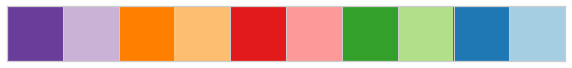

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import glob

sns.set(style="whitegrid", font_scale = 2.5)
palette = sns.color_palette("Paired", 10)
palette.reverse()
sns.palplot(palette)
sns.set_palette(palette)

pinned to dirs in /home/wesley_m/conformal-bayesopt/results/

In [2]:
keys = ["rnd", "ei", "nei", "ucb", "cei", "cnei", "cucb"]
labels = {k: kk for k, kk in zip(keys,
                                 [
        "Random", "EI", "NEI", "UCB", "Conformal EI", "Conformal NEI", "Conformal UCB", "KG", "Conformal KG"
                        ])}

keys = [keys[4], keys[1], keys[5], keys[2], keys[6], keys[3], keys[0]]

In [3]:
labels

{'rnd': 'Random',
 'ei': 'EI',
 'nei': 'NEI',
 'ucb': 'UCB',
 'cei': 'Conformal EI',
 'cnei': 'Conformal NEI',
 'cucb': 'Conformal UCB'}

In [4]:
%pdb

Automatic pdb calling has been turned ON


In [5]:
def get_results(prefix):
    results_dict = {k: [] for k in keys}
    for f in glob.glob("../results/"+prefix+"*.pt"):
        try:
            res = torch.load(f, map_location="cpu")
            res2 = res["results"]["best_achieved"]
            for key in keys:
                results_dict[key].append(res2[key])
        except RuntimeError:
            print("unable to load", f)
    return results_dict
        

In [6]:
def prep_mean_and_bands(lst, slice_ind=0):
    try:
        tsr = torch.tensor(lst)
    except:
        tsr = torch.stack(lst)#.t()
    if tsr.ndim > 2:
        tsr = tsr[...,slice_ind]
    cummaxes = tsr.cummax(0)[0]
    means = cummaxes.mean(0)
    stds = cummaxes.std(0)
    band = 2. * stds / cummaxes.shape[0]**0.5
    return means, means - band, means + band 

Text(0.5, 1.0, 'Levy-20')

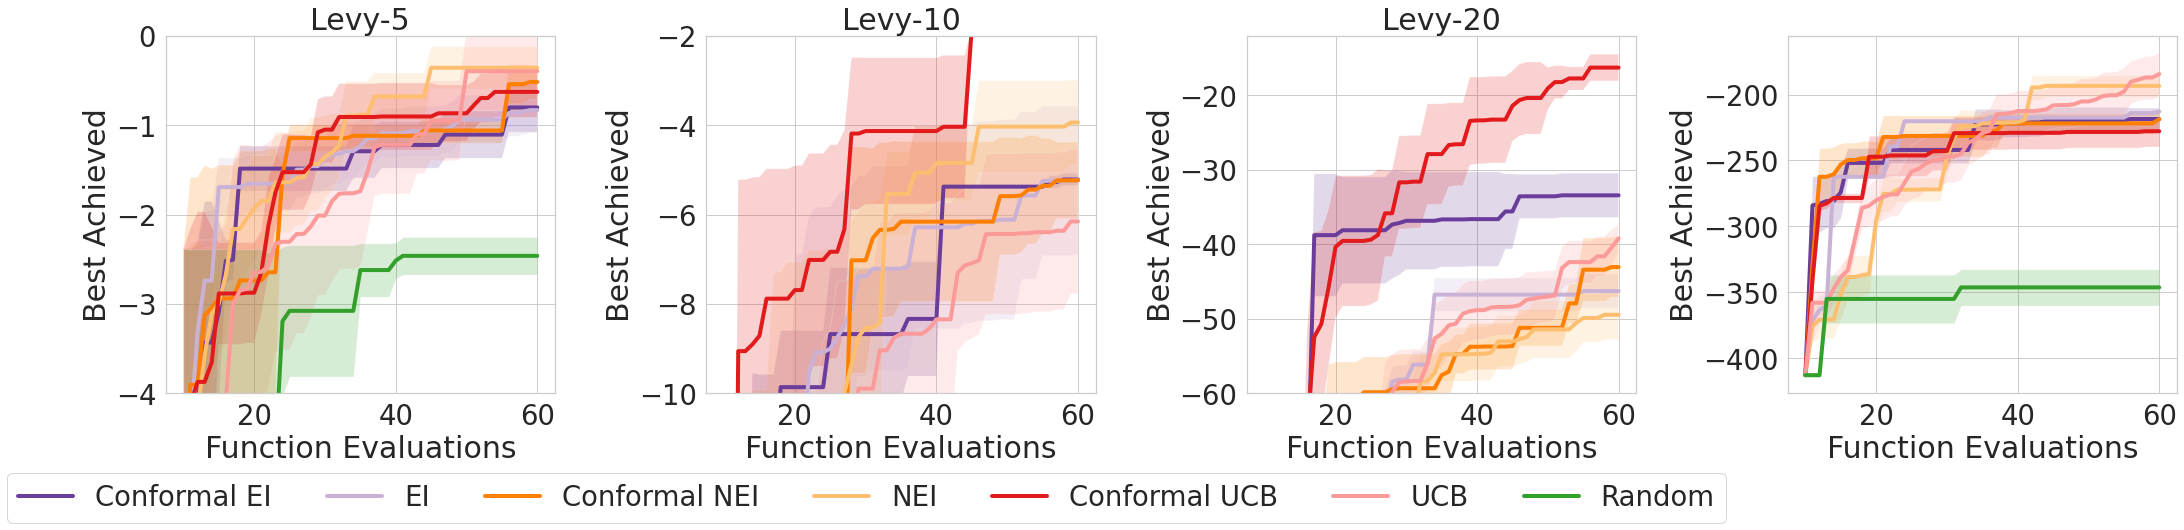

In [8]:
fig, ax = plt.subplots(1, 4, figsize = (30, 7))
# ax = [ax]
for i, prefix in enumerate(["ro_levy5_q1", "ro_levy10_q1", "ro_levy20_q1", "ro_levy50_q1"]):
    results_dict = get_results(prefix)
    x = torch.arange(10, 51 + 10)
    for key in keys:
        ax[i].plot(x, prep_mean_and_bands(results_dict[key])[0], label = labels[key], linewidth=4)
        ax[i].fill_between(x, *prep_mean_and_bands(results_dict[key])[1:], alpha = 0.2)

    # ax[i].set_ylim((-4., 0.2))
    ax[i].set_xlabel("Function Evaluations")
    ax[i].set_ylabel("Best Achieved")
# ax[0].set_ylim((-30, -10.))
ax[0].set_ylim((-4., 0.))
ax[1].set_ylim((-10., -2.))
ax[2].set_ylim((-60., -12.))
plt.tight_layout()
ax[0].legend(ncol = 7, loc = "lower center", bbox_to_anchor = (1.8, -0.4))
# ax[0].legend(ncol = 3, loc = "lower center", bbox_to_anchor = (0.5, -0.5))

ax[0].set_title("Levy-5")
ax[1].set_title("Levy-10")
ax[2].set_title("Levy-20")

# plt.savefig("levy_lownoise_q1.pdf", bbox_inches = "tight")

In [9]:
%pdb

Automatic pdb calling has been turned OFF


Text(0.5, 1.0, 'Levy-50')

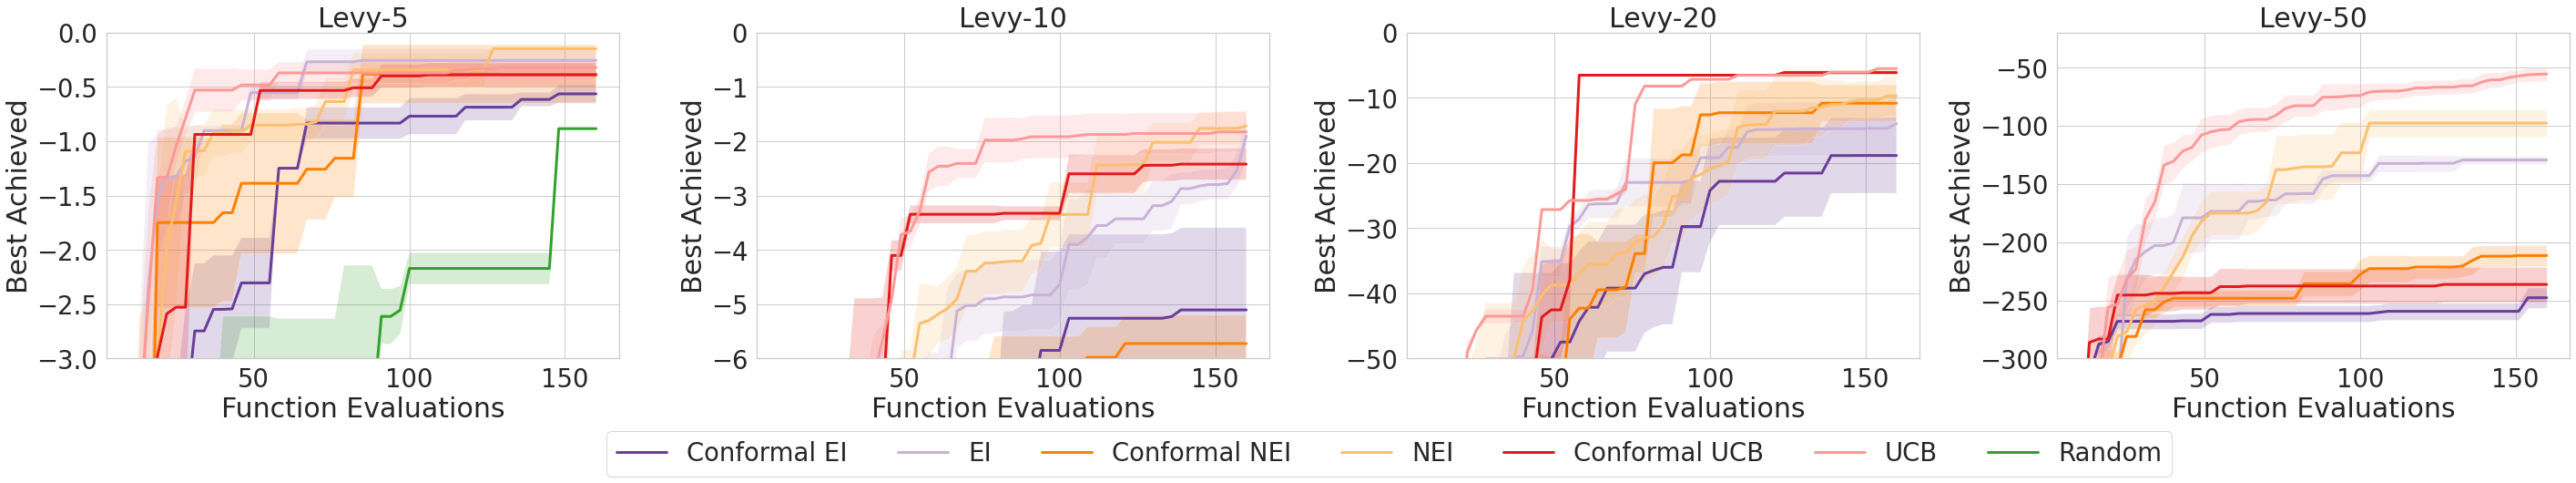

In [10]:
fig, ax = plt.subplots(1, 4, figsize = (40, 7))
# ax = [ax]
x = torch.arange(10, 51 * 3 + 10, 3)
for i, prefix in enumerate(["levy5_q3", "levy10_q3", "levy20_q3", "levy50_q3"]):
    results_dict = get_results(prefix)
    for key in keys:
        ax[i].plot(x, prep_mean_and_bands(results_dict[key])[0], label = labels[key], linewidth=3)
        ax[i].fill_between(x, *prep_mean_and_bands(results_dict[key])[1:], alpha = 0.2)

    # ax[i].set_ylim((-4., 0.2))
    ax[i].set_xlabel("Function Evaluations")
    ax[i].set_ylabel("Best Achieved")
    
# ax[0].set_ylim((-30, -10.))
ax[0].set_ylim((-3., 0.))
ax[1].set_ylim((-6., 0.))
ax[2].set_ylim((-50., 0.))
ax[3].set_ylim((-300, -20.))
plt.tight_layout()
ax[0].legend(ncol = 8, loc = "lower center", bbox_to_anchor = (2.5, -0.4))
# ax[0].legend(ncol = 3, loc = "lower center", bbox_to_anchor = (0.5, -0.5))

ax[0].set_title("Levy-5")
ax[1].set_title("Levy-10")
ax[2].set_title("Levy-20")
ax[3].set_title("Levy-50")
# plt.savefig("levy_q3_lownoise.pdf", bbox_inches = "tight")

In [11]:
# fig, ax = plt.subplots(1, 2, figsize = (15, 7))

# for i, prefix in enumerate(["levy20_q1", "levy20_alpha"]):
#     results_dict = get_results(prefix)
#     for key in keys:
#         ax[i].plot(prep_mean_and_bands(results_dict[key])[0], label = labels[key], linewidth=3)
#         ax[i].fill_between(torch.arange(51), *prep_mean_and_bands(results_dict[key])[1:], alpha = 0.2)

#     # ax[i].set_ylim((-4., 0.2))
#     ax[i].set_xlabel("Batch")
#     ax[i].set_ylabel("Best y Achieved")
# # ax[2].set_ylim((-15, -1.))
# plt.tight_layout()
# ax[1].legend(ncol = 5, loc = "lower center", bbox_to_anchor = (-0.8, -0.4))

# ax[0].set_title("alpha = 0.05")
# ax[1].set_title("alpha = 0.5")

In [12]:
# keys = ["ei", "nei", "ucb", "cei", "cnei", "cucb"]
keys = keys[:-1]

def get_results(prefix):
    results_dict = {k: [] for k in keys}
    for f in glob.glob("../results/"+prefix+"*.pt"):
        try:
            res = torch.load(f)
            res2 = res["results"]["coverage"]
            for key in keys:
                results_dict[key].append(res2[key])
        except RuntimeError:
            print("unable to load ", f)
    return results_dict

Text(0.5, 1.0, 'Levy-20')

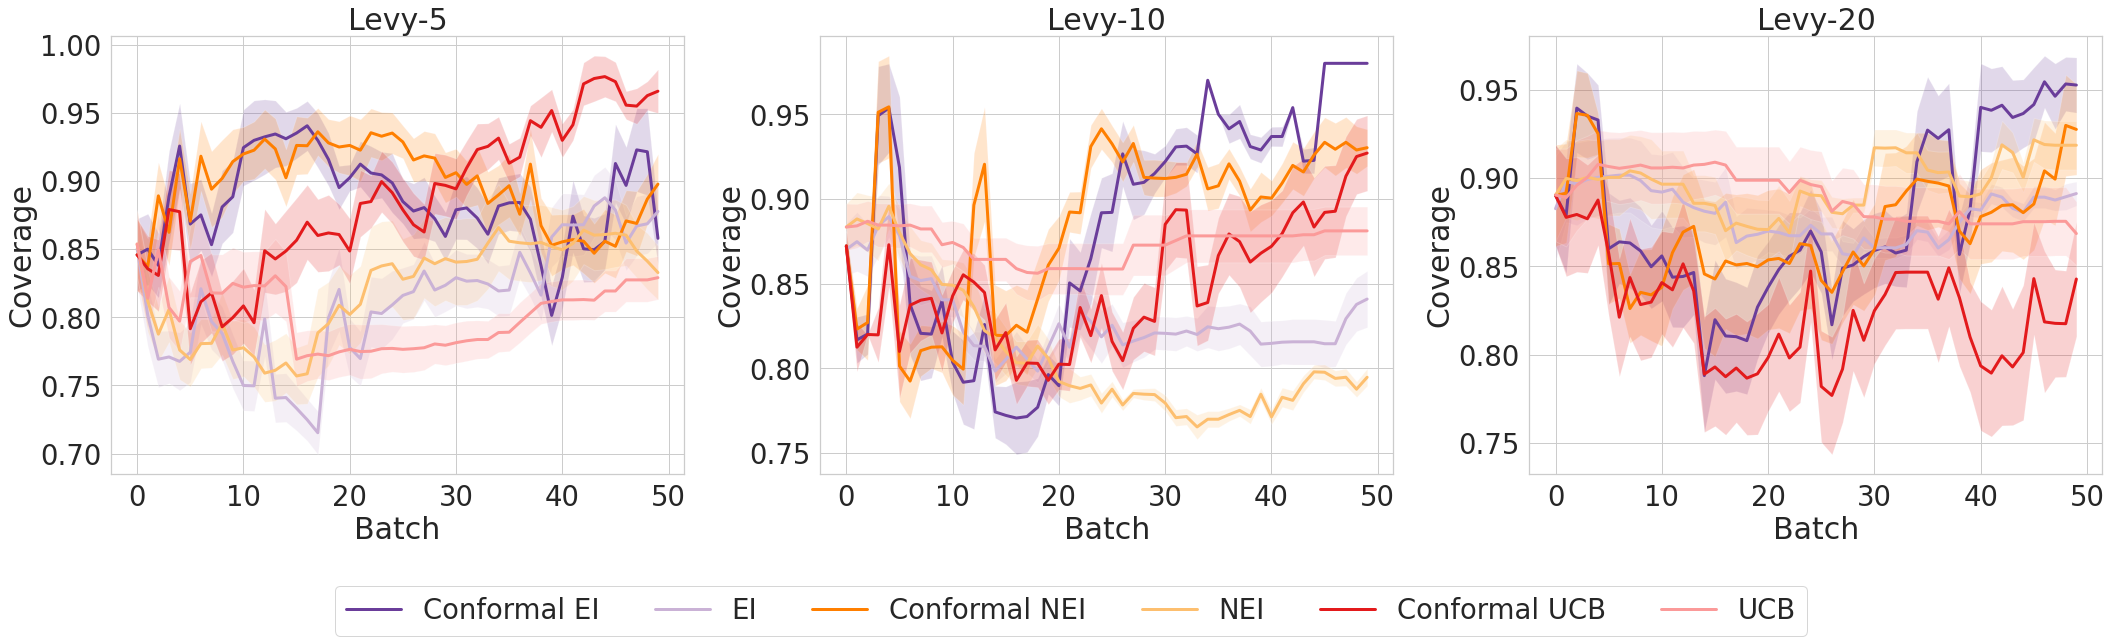

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (30, 8))

for i, prefix in enumerate(["q1/levy5", "q1/levy10", "q1/levy20"]):
    results_dict = get_results(prefix)
    for key in keys:
        slice_ind = 1 if key[0] == "c" else 0
        mean, lower, upper = prep_mean_and_bands(results_dict[key], slice_ind)
        x = torch.arange(mean.shape[0])
        ax[i].plot(x, mean, label = labels[key], linewidth=3)
        ax[i].fill_between(x, lower, upper, alpha = 0.2)

    # ax[i].set_ylim((-4., 0.2))
    ax[i].set_xlabel("Batch")
    ax[i].set_ylabel("Coverage")
# ax[2].set_ylim((-15, -1.))
plt.tight_layout()
ax[2].legend(ncol = 6, loc = "lower center", bbox_to_anchor = (-0.8, -0.4))

ax[0].set_title("Levy-5")
ax[1].set_title("Levy-10")
ax[2].set_title("Levy-20")

In [19]:
alpha = 1.0 / (0.8 * torch.arange(10, 50 * 1 + 10, 1))**0.5

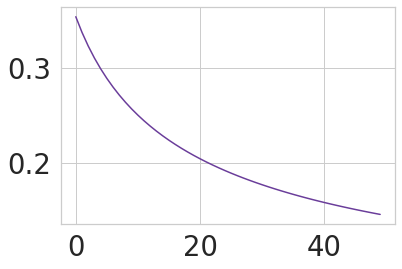

In [20]:
plt.plot(alpha)

In [21]:
from scipy.stats import binom

In [22]:
torch.arange(50)[binom.cdf(torch.arange(50), 50, 0.5) < 0.025][-1]

tensor(17)

In [23]:
torch.arange(50)[binom.cdf(torch.arange(50), 50, 0.5) > 0.975][0]

tensor(32)

Text(0.5, 1.0, 'Levy-50')

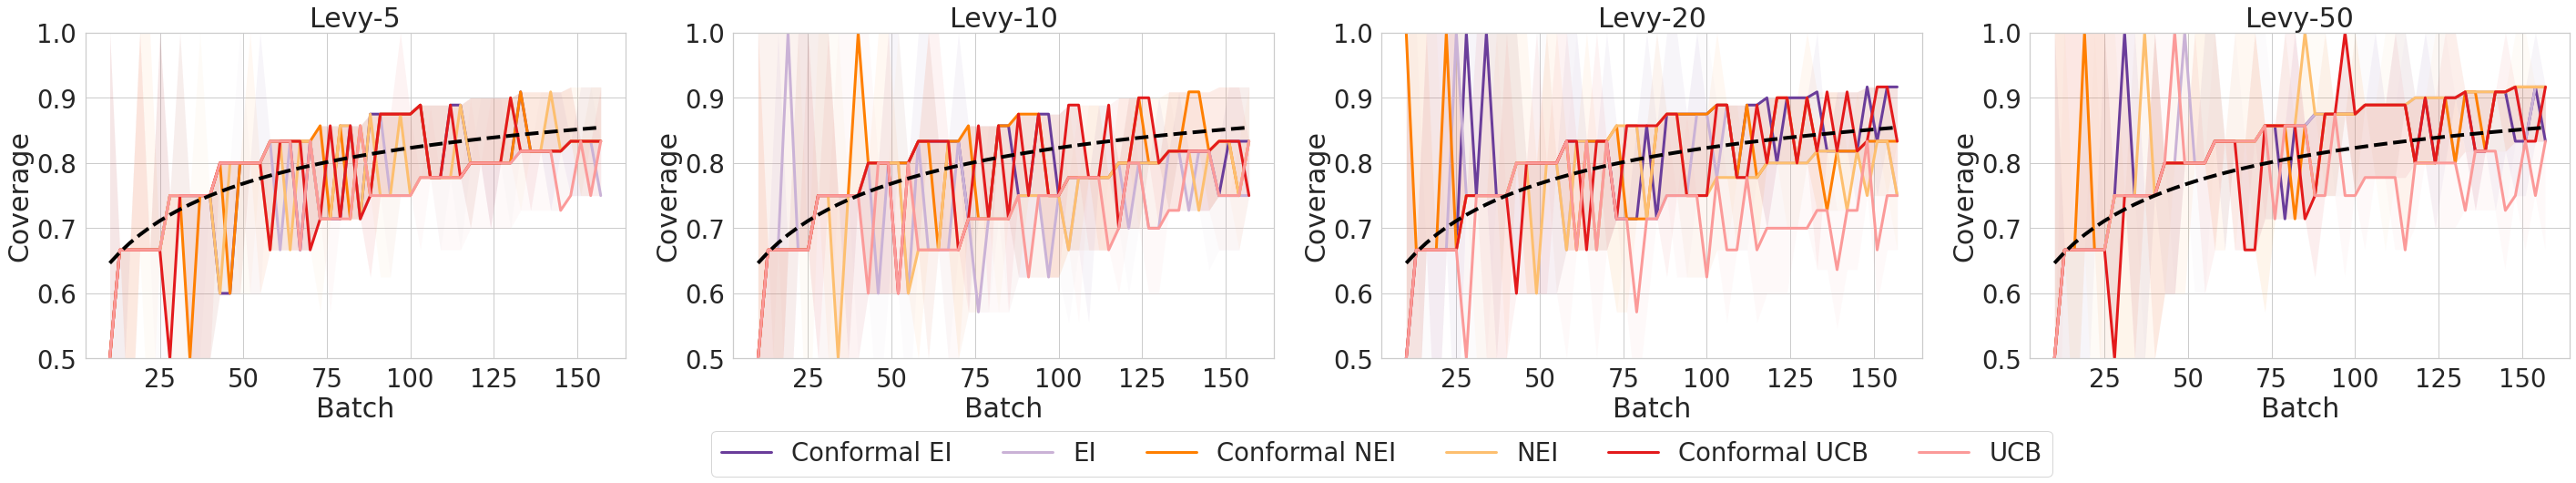

In [25]:
fig, ax = plt.subplots(1, 4, figsize = (40, 7))

x = torch.arange(10, 50 * 3 + 10, 3)

for i, prefix in enumerate(["ro_levy5", "ro_levy10", "ro_levy20", "ro_levy50"]):
    results_dict = get_results(prefix)
    ax[i].plot(x, 1 - alpha, color = "black", linestyle="--", zorder=10, linewidth = 4)
    for key in keys:
        tsr = torch.tensor(results_dict[key])
        medians = tsr.nanmedian(0)[0]
        
        ntrials = tsr.shape[0]
        l = torch.arange(ntrials)[binom.cdf(torch.arange(ntrials), ntrials, 0.5) < 0.025][-1]
        u = torch.arange(ntrials)[binom.cdf(torch.arange(ntrials), ntrials, 0.5) > 0.975][0]
        sorted_cvals = tsr.sort(0)[0][[l.item(), u.item()]]
        
        slice_ind = 1 if key[0] == "c" else 0
        ax[i].plot(x, medians[...,slice_ind], label = labels[key], linewidth=3)
        
        # ax[i].plot(prep_mean_and_bands(results_dict[key],1)[0], label = labels[key], linewidth=3)
        ax[i].fill_between(x, sorted_cvals[0, ..., slice_ind], sorted_cvals[1, ..., slice_ind], alpha = 0.05)

    # ax[i].set_ylim((-4., 0.2))
    ax[i].set_xlabel("Batch")
    ax[i].set_ylabel("Coverage")
    ax[i].set_ylim((0.5, 1.0))
# ax[2].set_ylim((-15, -1.))
plt.tight_layout()
ax[2].legend(ncol = 7, loc = "lower center", bbox_to_anchor = (-0.0, -0.4))

ax[0].set_title("Levy-5")
ax[1].set_title("Levy-10")
ax[2].set_title("Levy-20")
ax[3].set_title("Levy-50")
# plt.savefig("levy_q3_coverage.pdf", bbox_inches = "tight")

In [23]:
torch.tensor(results_dict[key]).median(0)[0].shape

torch.Size([50, 2])

Text(0.5, 1.0, 'alpha = 0.5')

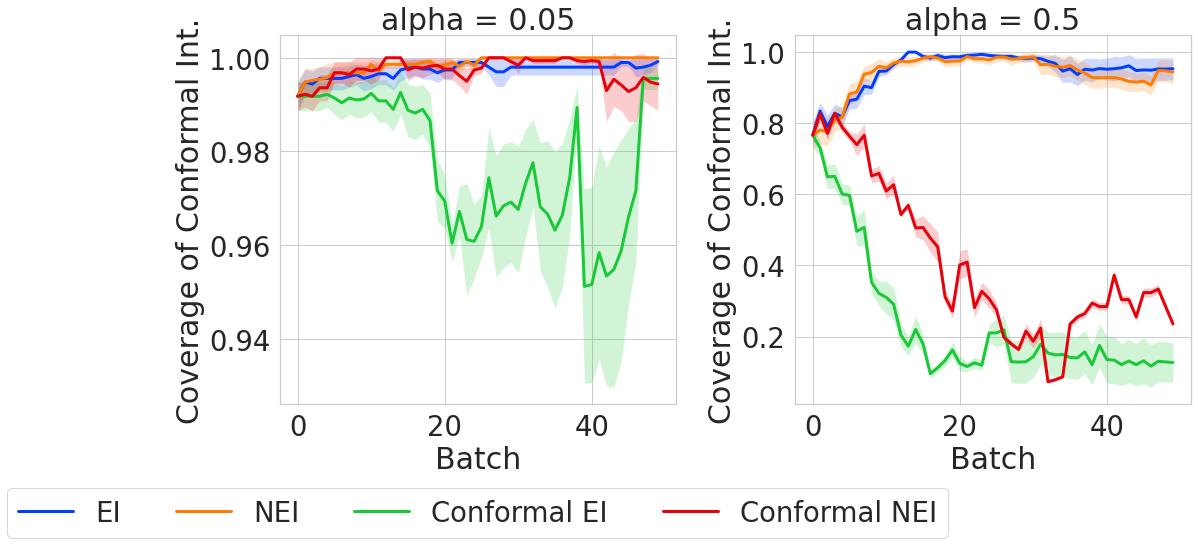

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

for i, prefix in enumerate(["levy20_q1", "levy20_alpha"]):
    results_dict = get_results(prefix)
    for key in keys:
        ax[i].plot(prep_mean_and_bands(results_dict[key])[0], label = labels[key], linewidth=3)
        ax[i].fill_between(torch.arange(50), *prep_mean_and_bands(results_dict[key])[1:], alpha = 0.2)

    # ax[i].set_ylim((-4., 0.2))
    ax[i].set_xlabel("Batch")
    ax[i].set_ylabel("Coverage of Conformal Int.")
# ax[2].set_ylim((-15, -1.))
plt.tight_layout()
ax[1].legend(ncol = 5, loc = "lower center", bbox_to_anchor = (-0.8, -0.4))

ax[0].set_title("alpha = 0.05")
ax[1].set_title("alpha = 0.5")

In [29]:
from botorch.test_functions import Levy

In [31]:
for f in glob.glob("../results/levy10_q1_1.pt"):
    res = torch.load(f)

In [34]:
func = Levy(dim=10, negate = True)
f = lambda x: func(x * (func.bounds[1] - func.bounds[0]) + func.bounds[0])

In [39]:
res["results"]["inputs"]["ei"].shape

torch.Size([60, 10])

In [40]:
f(res["results"]["inputs"]["ei"].cpu())

tensor([ -39.0324, -165.6954,  -65.6406, -143.6252,  -78.6549,  -67.1925,
        -149.3218,  -54.6139,  -63.8694,  -86.8573,  -80.6900,  -51.6152,
         -32.5584,  -55.2211,  -82.3787,  -49.2235,  -28.3643,  -53.1815,
         -46.4519,  -49.0486,  -50.4949,  -65.6191,  -49.3429,  -21.1989,
         -42.9718,  -21.3746,  -35.6467,  -28.6086,  -20.9489,  -36.3810,
         -35.1710,  -25.6163,  -49.3497,  -17.7102,  -13.3222,  -14.0143,
         -20.6550,  -31.8479,  -45.7478,  -21.7608,  -16.5094,  -15.4603,
         -32.8091,  -11.1966,  -17.0668,  -11.8785,  -12.7169,  -17.9038,
         -14.6916,   -6.5310,  -10.9145,   -9.1871,   -5.5912,   -7.2023,
          -7.1709,   -8.4976,   -6.3198,  -16.2699,   -5.0969,   -5.7313],
       dtype=torch.float64)

In [70]:
def get_results(prefix, dim=None):
    if dim is None:
        dim = int(prefix[-1])
        if dim == 0:
            dim = int(prefix[-2:])
        print(dim)
    func = Levy(dim=dim, negate = True)
    ff = lambda x: func(x * (func.bounds[1] - func.bounds[0]) + func.bounds[0])
    results_dict = {k: [] for k in keys}
    for f in glob.glob("../results/"+prefix+"*.pt"):
        res = torch.load(f)
        res2 = res["results"]["inputs"]
        for key in keys:
            results_dict[key].append(ff(res2[key].cpu()))
    return results_dict

In [66]:
def prep_mean_and_bands(lst):
    tsr = torch.stack(lst)#.t()
    cummaxes = tsr.cummax(1)[0]
    means = cummaxes.mean(0)
    stds = cummaxes.std(0)
    band = 2. * stds / cummaxes.shape[0]**0.5
    return means, means - band, means + band 

In [44]:
%pdb

Automatic pdb calling has been turned ON


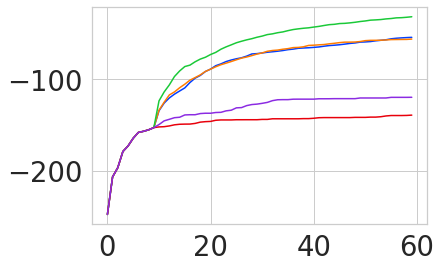

In [63]:
plt.plot(torch.stack(results_dict["ei"]).cummax(1)[0].mean(0))
plt.plot(torch.stack(results_dict["nei"]).cummax(1)[0].mean(0))
plt.plot(torch.stack(results_dict["kg"]).cummax(1)[0].mean(0))
plt.plot(torch.stack(results_dict["cei"]).cummax(1)[0].mean(0))
plt.plot(torch.stack(results_dict["cnei"]).cummax(1)[0].mean(0))


5
10
1


Text(0.5, 1.0, 'Levy-20')

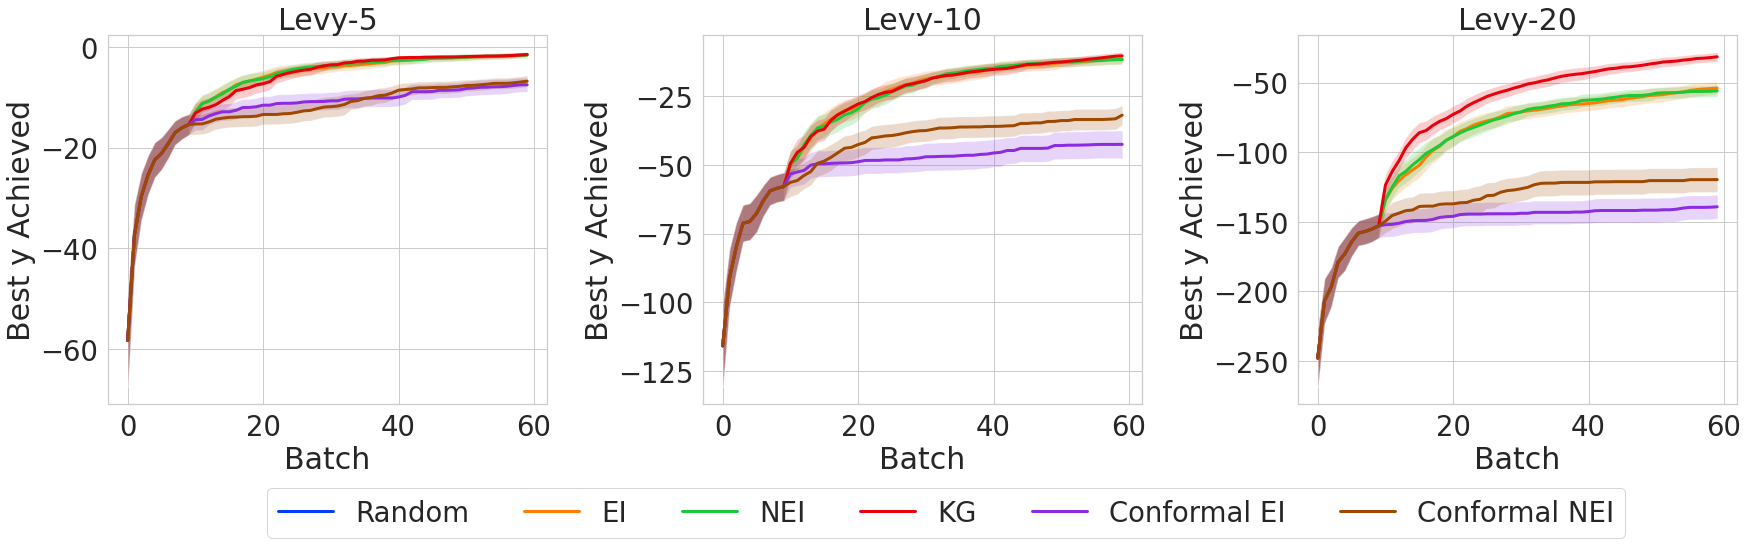

In [68]:
fig, ax = plt.subplots(1, 3, figsize = (25, 7))

for i, prefix in enumerate(["levy5", "levy10", "levy20_q1"]):
    results_dict = get_results(prefix)
    for key in keys:
        ax[i].plot(prep_mean_and_bands(results_dict[key])[0], label = labels[key], linewidth=3)
        ax[i].fill_between(torch.arange(60 if key != "rnd" else 10), *prep_mean_and_bands(results_dict[key])[1:], alpha = 0.2)

    # ax[i].set_ylim((-4., 0.2))
    ax[i].set_xlabel("Batch")
    ax[i].set_ylabel("Best y Achieved")
# ax[2].set_ylim((-15, -1.))
plt.tight_layout()
ax[2].legend(ncol = 6, loc = "lower center", bbox_to_anchor = (-0.8, -0.4))

ax[0].set_title("Levy-5")
ax[1].set_title("Levy-10")
ax[2].set_title("Levy-20")

Text(0.5, 1.0, 'alpha = 0.5')

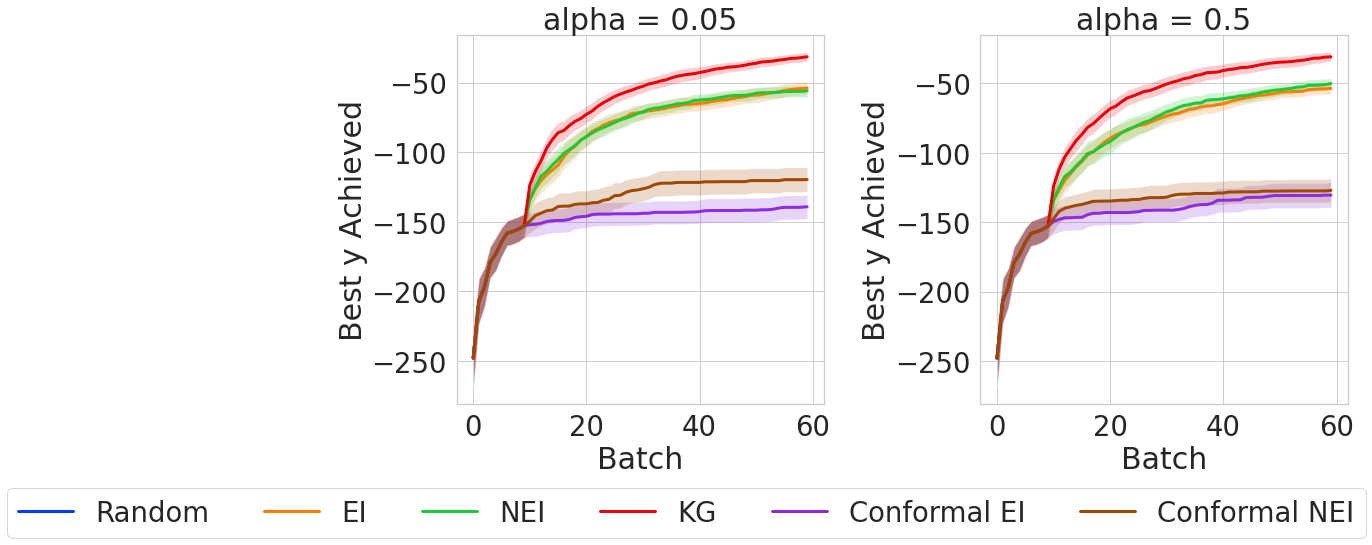

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

for i, prefix in enumerate(["levy20_q1", "levy20_alpha"]):
    results_dict = get_results(prefix, dim=20)
    for key in keys:
        ax[i].plot(prep_mean_and_bands(results_dict[key])[0], label = labels[key], linewidth=3)
        ax[i].fill_between(torch.arange(60 if key != "rnd" else 10), *prep_mean_and_bands(results_dict[key])[1:], alpha = 0.2)

    # ax[i].set_ylim((-4., 0.2))
    ax[i].set_xlabel("Batch")
    ax[i].set_ylabel("Best y Achieved")
# ax[2].set_ylim((-15, -1.))
plt.tight_layout()
ax[1].legend(ncol = 6, loc = "lower center", bbox_to_anchor = (-0.8, -0.4))

ax[0].set_title("alpha = 0.05")
ax[1].set_title("alpha = 0.5")